### Importing the Packages

In [1]:
import pandas as pd                                    # Importing pandas for dataframe
import numpy as np                                     # Importing numpy array
import re                                              # Importing Regular Expression
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the file

In [2]:
 items = pd.read_csv("20190928-items.csv")

In [3]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [4]:
items.shape

(792, 9)

In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          792 non-null    object 
 1   brand         792 non-null    object 
 2   title         792 non-null    object 
 3   url           792 non-null    object 
 4   image         792 non-null    object 
 5   rating        792 non-null    float64
 6   reviewUrl     792 non-null    object 
 7   totalReviews  792 non-null    int64  
 8   prices        577 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


#### Pre-Processing of the data


In this Project, it will be concentrating on the important features like asin, brand, title, rating and total review for better analysis. But the other non-important features which are left will not considered because of very less impact in the analysis.

### Distribution of the brand by asin(unqiue number of the brand)

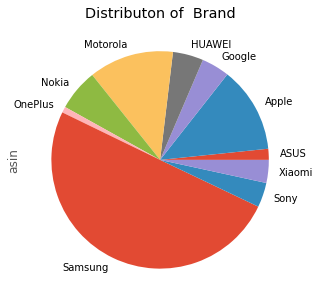

In [6]:
plt.style.use("ggplot")
brand_Dis = items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 
                                                 title="Distributon of  Brand")
plt.show()

Here in the above the pie chart, it shows the distributiono of the mobile phone from various brands with respect asin. Here asin stands for Amazon Standard Identification Number which is assigned to the amazon products.
So From the above graph, it states that the proportion of samsung mobiles is higher or we can say have more number of customers than other brands, followed by "apple" and "motorola" have almost equal distribution. 

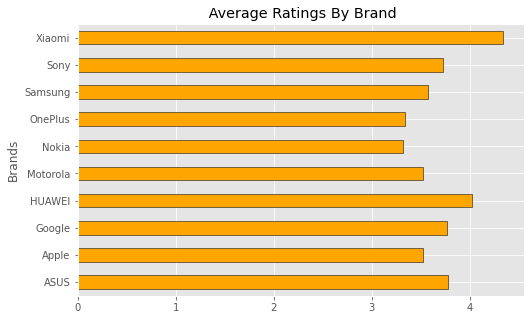

In [25]:
plt.style.use("ggplot")
average_rating = items.groupby("brand").mean()["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "orange",
                                                 xlabel = "Brands",
                                                 ylabel = "Average Ratings",             
                                                 edgecolor = "black",
                                                 title=" Average Ratings By Brand")

plt.show()

In [8]:
Reviews =  pd.read_csv("20190928-reviews.csv")

In [9]:
Reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [10]:
Reviews.shape

(82815, 8)

### Merging Files
For sentimental analysis, in this project I have done a left join two merge the review.csv and items.csv into single csv called as Amazon_Reviews.


In [11]:
# Two csv merge using left join on the asin field common in both csv's
Amazon_Reviews = pd.merge(Reviews, items, how="left", left_on="asin", right_on="asin")

In [12]:
Amazon_Reviews.head()

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,prices
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN


In [13]:
Amazon_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82815 entries, 0 to 82814
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          82815 non-null  object 
 1   name          82810 non-null  object 
 2   rating_x      82815 non-null  int64  
 3   date          82815 non-null  object 
 4   verified      82815 non-null  bool   
 5   title_x       82805 non-null  object 
 6   body          82795 non-null  object 
 7   helpfulVotes  33134 non-null  float64
 8   brand         82815 non-null  object 
 9   title_y       82815 non-null  object 
 10  url           82815 non-null  object 
 11  image         82815 non-null  object 
 12  rating_y      82815 non-null  float64
 13  reviewUrl     82815 non-null  object 
 14  totalReviews  82815 non-null  int64  
 15  prices        59145 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(11)
memory usage: 10.2+ MB


After merging the both files, there total 15 features and 82815 observation are there.

In [14]:
# Convert string into datetime
from datetime import datetime
Amazon_Reviews["date"] = Amazon_Reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
Amazon_Reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [15]:
Amazon_Reviews["year"] = Amazon_Reviews["date"].apply(lambda x: x.replace(day=1))
Amazon_Reviews["year"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: year, dtype: datetime64[ns]

In [16]:
Amazon_Reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
Amazon_Reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices,year
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,2005-10-01
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,2004-01-01
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,2003-12-01
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,2004-03-01
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,2005-08-01


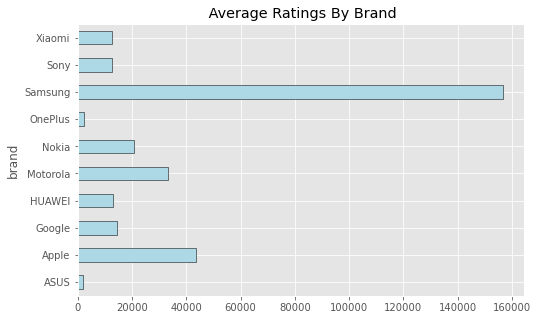

In [17]:
plt.style.use("ggplot")
average_rating = Amazon_Reviews.groupby("brand").sum()["rating"].plot(kind="barh", 
                                                 figsize=(8, 5),
                                                 color = "lightblue",
                                                 edgecolor = "black",
                                                 title=" Average Ratings By Brand")

plt.show()

Here in the above graph, based on this I want to work top 3 brand which highest total ratings in which Samsung, Apple and Motorola will falls into the top three categories.

#### Text Cleaning and Processing

In [18]:
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###### In text cleaning the steps are:
1. Coverting all the text into lowercase.
2. Removing punctuation from the text.
3. Removing keywords from the text like phone, brand name etc.


In [20]:
### Use this to create the corpus. Use the same steps from the last lab

# Steps for cleaning the first review and apply for loop on all the reviews
Amazon_Reviews['title'][0]
text = re.sub('[^a-zA-Z]', ' ', Amazon_Reviews['title'][0]) # only keep the letters so what we dont want to remove
text = text.lower() # make all letters as lowercase 
text = text.split()  # split the review into separate words to create a list of words
#ps =PorterStemmer()
text = [ word for word in text if not  word in set(stopwords.words('english'))] # use set for larger text
text = ' '.join(text) # take the list of words back into the string



In [1]:
text

NameError: name 'text' is not defined

In [22]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', Amazon_Reviews['title'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus

['def best worst',
 'text messag work',
 'love phone',
 'love phone',
 'great phone servic option lousi case',
 'work great',
 'wanna cool nokia',
 'problem univers headset',
 'cool phone',
 'piss littl bit',
 'work great dropt',
 'slow annoy fragil heavi bulki',
 'worth pay someth els',
 'great free phone sprint custom',
 'stupid phone',
 'exel servic',
 'love',
 'phone lock',
 'excel product',
 'warn',
 'nextel boost phone',
 'nice',
 'seem work exist sim card',
 'five star',
 'suppli need',
 'job',
 'awesom',
 'one star',
 'cheap ok qualiti',
 'phone gave concuss may come faulti batteri',
 'three star',
 'tough phone',
 'year',
 'simpli great',
 'great',
 'motorola c',
 'good littl phone',
 'great phone',
 'motorola fan',
 'perfect bare bone practic indestruct phone',
 'solid phone',
 'great dispos phone',
 'two one',
 'second one year',
 'batteri fit plastic guard side opposit contact separ insert batteri due poor fit',
 'steel nokia steel',
 'unreli',
 'poor qualiti',
 'tough litt

As you can see in the above output, we have added four new columns containing the sentiment scores of the Review column. Now the next task is to add labels by categorizing these scores. According to the industry standards, if the compound score of sentiment is more than 0.05, then it is categorized as Positive, and if the compound score is less than -0.05, then it is categorized as Negative, otherwise, it’s neutral. So with this information, I will add a new column in this dataset which will include all the sentiment labels: